# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# from sklearn.cross_validation import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn.model_selection import learning_curve

# Import supplementary visualizations code visuals.py
# import visuals as vs
import visuals_day as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
# calculating descriptive statistics
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [3]:
# TODO: Minimum price of the data
minimum_price = np.min(data['MEDV'])

# TODO: Maximum price of the data
maximum_price = np.max(data['MEDV'])

# TODO: Mean price of the data
mean_price = np.mean(data['MEDV'])

# TODO: Median price of the data
median_price = np.median(data['MEDV'])

# TODO: Standard deviation of prices of the data
std_price = np.std(data['MEDV'])

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:.2f}".format(minimum_price)) 
print("Maximum price: ${:.2f}".format(maximum_price))
print("Mean price: ${:.2f}".format(mean_price))
print("Median price ${:.2f}".format(median_price))
print("Standard deviation of prices: ${:.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.00
Maximum price: $1024800.00
Mean price: $454342.94
Median price $438900.00
Standard deviation of prices: $165171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer: **

- Feature: 'RM'  | Average number of rooms among homes in the neighborhood.
I guess as the number of rooms increases so does the price of the home - intuition is that additional built area will cost additional dollars. 
Therefore I am anticipating a home that has an 'RM' value(number of rooms) of 6 be worth more or less than a home that has an 'RM' value of 7?

- Feature: 'LSTAT' |  %age lower status of the population. Population with lower status i.e. relatively lower financial earnings will buy a lower priced home. Lower priced home is generally found in the poor neighborhood. 
Therefore, I would guess LSTAT' value(percent of lower class workers) of 15 have home prices be worth more than a neighborhood that has an 'LSTAT' value of 20. Feature 'LSTAT'  is inversely related to 'MDEV'

- Feature: 'PTRATIO' |  Pupil-Teacher ratio by town
My intuition 'PTRATIO' will higher in poor town thus poor neighborhood or lower priced house. So, feature 'PTTRATIO' should be  inversely related to 'MDEV'
I would expect a neighborhood that has an 'PTRATIO' value(ratio of students to teachers) of 10 have home prices be worth more than a neighborhood that has an 'PTRATIO' value of 15? 

Below line plot loosely matches intuition.


''

<Figure size 864x576 with 0 Axes>

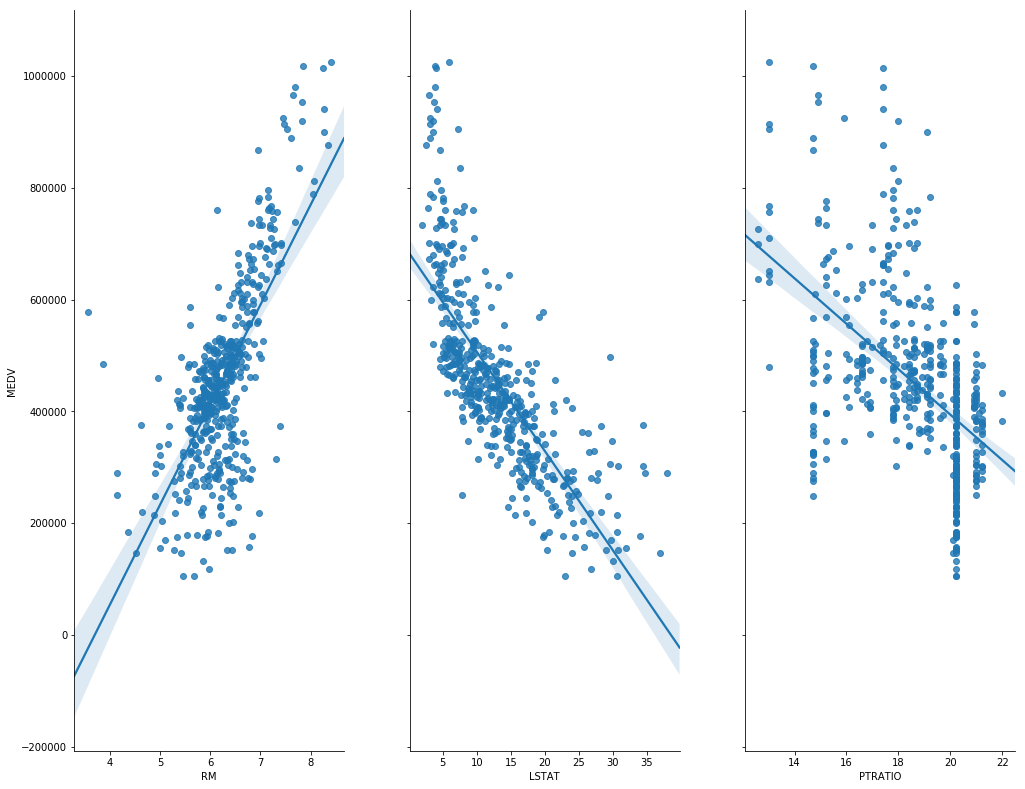

In [4]:

plt.figure(figsize=(12,8))
g=sns.pairplot(data,
             x_vars = ['RM', 'LSTAT', 'PTRATIO'],
             y_vars = ['MEDV'],
             kind = 'reg'
            )

g.fig.set_size_inches(15,15)


;

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [5]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score
                     
                     

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [6]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))
 

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:**

- Would you consider this model to have successfully captured the variation of the target variable?

Value of R^2 is equal to 0.923 or 92.3%. It  suggest that 92.3% of variance in target variable(y)  is predictable from feature variable(X). As 0.923 is close to 1, model fits data closely.
So I would consider this model have successfully captured the variation of the target variable.

- Why or why not?

The value of R-square oscillates between +1 and -1. As R-square is 0.923 or 92.3% close to +1 – it shows positive (direction) relationship between target and feature variable. Which means if value of feature variable increses so does the value of target variable and vice versa. 

Below is a brief explanation of how r-square is calculated. 

Total sum of sqaures error between regression lines and data points or Total variation in y NOT described by the regression line or sum of square residuals/predictive errors or or Sum of squared errors (SSE) can be defined as


$$
Sum\; of\; squared\; errors\;(SSE) = (y_{1} - \hat y_{1})^{2} + (y_{2} - \hat y_{2})^{2} + - - - - - + (y_{n} - \hat y_{n})^{2}
$$

$$
Where\; 
$$
$$\;y_{1}, y_{2}, .. y_{1} \;\;\;\;are\; target\; variables\;,$$ 

$$\;\hat y_{1}, \hat y_{2}, ..\hat y_{n} \;\;\;\;are\; predictive\; target\; variables\; on\; regression \;line.\;, $$ 

$$ and \;  \hat y = mx + b,\; m\; is\; slope\; and\; b\; is\; y-intercept\; $$


$$ So,\;
Sum\; of\; squared\; errors\;(SSE) = [ y_{1} - (mx_{1} + b)^{2} ] + [ y_{2} - (mx_{2} + b)^{2} ] + - - - - - + [ y_{n} - (mx_{n} + b)^{2} ]
$$



$$
$$

Additionally , total sum of squares (SST) or total variation in y

$$
Total\; Sum\; of\; squares\;(SST) = (y_{1} - \bar y)^{2} + (y_{2} - \bar  y)^{2} + - - - - - + (y_{n} - \bar  y)^{2}
$$

$$
Where\; 
$$
$$\;\bar y\; is\; mean\; of\; target\; variables\;,$$ 

$$
$$

So, R-square(coefficient of determination), the percentage of variation in target variable  described by  x or regression line can be written as 

$$ R-sqaure =  1 -  \frac {Sum\; of\; squared\; errors\;(SSE)}{Total\; Sum\; of\; squares\;(SST)} $$

$$
$$

Which implies that if 
- Sum of squared errors (SSE) is large(bigger residual) then the value of r-square will be small(closer to 0 ) resulting weaker/none relationship between feature and target variable. Data points are farther to the regression line. 

- Sum of squared errors (SSE) is smaller(smaller residual - fitted regression line) then the  value of r-square will be larger(closer to +1 ) resulting positive/stronger relationship between feature and target variable. Data points are closer to regression line. 





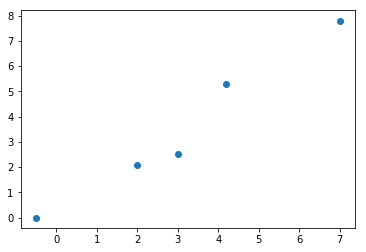

In [20]:
true_value = [3, -0.5, 2, 7, 4.2]
prediction = [2.5, 0.0, 2.1, 7.8, 5.3]

plt.scatter(true_value, prediction)

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [7]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
# Using 20% data for test and default random state of 42
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.20, random_state=42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: **

We split the dataset into training data and test data so that classification/prediction model(algorithm) can learn from training data about the relationship(some pattern with minimum error rate)  between feature (predictor) variable and the target(outcome) variable.

Once the algorithm is trained on training data, the algorithm is tested on holdout set i.e test data( like unknown data - not seen before) for its performance(accuracy). 

One big flaw in having holdout set is that a portion(test data) is not used for training algorithm. 
To overcome this issue, we use cross-validation.

There are many cross-validation methods. One of the methods to improve prediction and generalize better is K-Folds Cross-Validation. In K-Folds Cross-Validation method, data is split k groups. From each group, K-1 subsets are used to train algorithm and last subset for testing data.

So, it turns out that 
 - higher the K-folds lead to reducing error(overfitting) due to low bias but incrementing error due to high variance. Also higher computational price in terms of CPU and memory.
 - lower K-folds lead to increasing error(underfitting) due to high bias but decreasing error due to variance and lower higher computational price in terms of CPU and memory.

Plotting validation curve can help to choose optimum value of K-fold.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

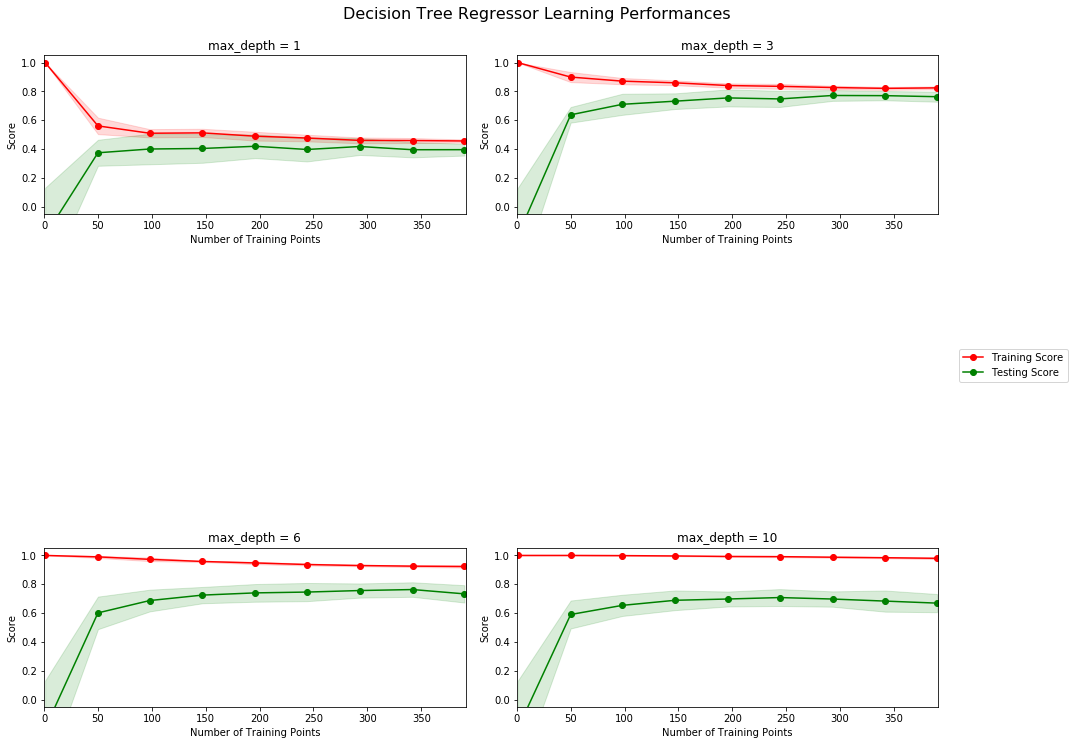

In [8]:
# Video Lesson 10 : Model Selection | Chapter 5 Learning Curves
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: **
I am Choosing the plot with max_depth =10.

Here, the Hyperparameter max_depth controls the model(Decision Tree Regressor) complexity - this means the longest path from the tree root to a leaf.  

The above (max_depth =10) graph shows high variance and low bias - which leads to overfitting i.e. model is complex that fits well with training data but generalizes poorly on new data. 

There is a large gap( relative to max_depth = 1, 3 and 6 ) between 'Training Score" and 'Testing Score" - higher variance. 

The value of R-squared, goodness-of-fit,  is almost "1" for training score i.e. training data is fitting nicely to model - essentially overfitting. 

The value of R-squared of test score increases as a number of data points is incremented from 25 and tapered from 150 onwards.

From the plot, it looks like from training points more than 250 does not benefit the model so no need to add more training points.



### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

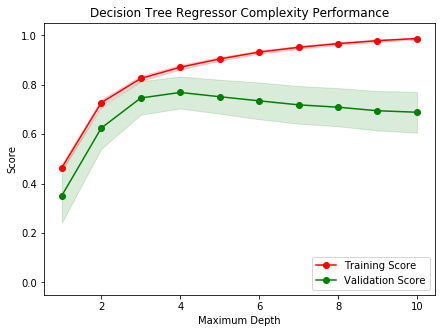

In [9]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: **

When the model is trained with a maximum depth of 1, the model suffers from high bias and low variance. Such a model underfit the data. Underfit Model is unable to capture data's underlying complexity trend. This lead to poor predictions.

When the model is trained with a maximum depth of 10, the graph shows high variance and low bias. Such a model overfit the data and performs well on the training data. When model overfits the data, it does not perform well against test data thus unable to generalize to unseen data.

From plot above we see that when maximum depth is 4,   R2 has maximum value of 0.8. Maximum depth of 4 is a sweet spot where underfit and overfit trade-off can be made.

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: **


A better choice would be graph with max_depth = 4 - where training and testing score curves are converging ( i.e. decreasing bias and variance) or curves close to each other - adding more training data will not improve fit. 

Intution is to look for sweet spot( trade-off between bias and variance) - somewhere between Underfit(low-complexity) and overfit(high-complexity. 



-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: **

As explained above question - once we have selected Optimal model - the next step is to improve the model's generalization performance by tuning its hyperparameters using  Grid search.

Hyperparameters are set using heuristics and often assigned using trial and error. Hyperparameters are not directly estimated from given data. 

'Grid' entails to a combination of chosen hyperparameters and their various values,  and then using Gridsearch to achieve optimum performance gain.   

For example, let's consider support vector machine(SVM) classifier. SVM has following hyperparameters:
- Kernel,
- C and
- Gamma

These hyperparameters can be manually optimized by  using Grid search as show below

Note: So from below example, SVC best optimized when hypermeters C = 1 and gamma = 0.01,  i.e SVC classifier does not underfit and not overfit but somewhere in the middle to better generalize unknow data. 

In [10]:

import warnings
warnings.filterwarnings("ignore", category=Warning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.20, random_state=42)


# Defining grid to optimize hyper parameters 'C' and 'Gamma'
hyperparameter_Cs = [0.001, 0.01, 0.1, 1, 10]
hyperparameter_gammas = [0.001, 0.01, 0.1, 1]
hyperparameter_grid = {'C': hyperparameter_Cs, 'gamma' : hyperparameter_gammas}

# Using Support vector classifier(SVC) from SVM and using kernel 'Radial basis Function'(rbf)
classifier_svm = SVC(kernel='rbf')


grid_search = GridSearchCV(classifier_svm, hyperparameter_grid)
grid_search.fit(X_train, y_train )
print(grid_search.best_params_)





{'C': 1, 'gamma': 0.01}


In [11]:
# Other method
grid_search.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: **

- What is the k-fold cross-validation training technique? 

In K-fold validation, we split the dataset into k equal-sized samples. Then we take single subsample as a validation data for testing model and rest k-1 subsamples are used for training data. After that, we repeat this cross-validation process in k times with each k subsamples used exactly once as the validation data. The k results can be averaged to produce a single estimation - this leads to a better performance of the model  in comparison to a single estimation from two subsets of train and test data.

- What benefit does this technique provide for grid search when optimizing a model?

The advantage of the k-fold cross-validation method is that it can also be used to compare model performance with different hyperparameters. K-fold cross-validation is applied in every combination of hyper-parameter and then the best metric combination of hyperparameters values are chosen.

Here is short example below.


In [12]:
from sklearn.model_selection import KFold

# Lets split data into 5 folds, shuffle it with randon state of 5. 
kfold = KFold(n_splits=5,shuffle=True,random_state=5)

# Spliting 'data' into 5 flods using 'kfold'
for i, value in enumerate(kfold.split(data)):
    i += 1
    print('Datset Number:{},\n  Training:{} \n Test:{}, \n'.format(i, value[0], value[1]))


Datset Number:1,
  Training:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  22  23  24  25  26  27  29  30  31  32  35  36  37  38  39
  41  42  44  45  46  47  48  49  51  53  54  55  57  58  59  60  61  62
  63  64  65  67  68  69  70  72  73  74  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  91  92  93  94  95  96  97 100 101 102 103 104
 105 106 108 109 110 111 112 113 114 115 118 119 120 121 124 125 126 127
 128 129 130 132 133 134 135 136 137 138 139 141 142 143 144 145 146 147
 148 152 154 155 158 159 160 161 164 165 166 167 168 169 171 172 173 174
 175 177 178 179 180 181 182 183 184 185 187 188 189 190 192 193 194 195
 196 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 220 221 222 223 224 225 226 227 228 229 231 232 233 235 239 240
 243 244 245 246 247 249 250 251 252 254 255 256 257 258 259 260 261 263
 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 282
 284 285 287 289 290 29

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [13]:
ShuffleSplit

sklearn.model_selection._split.ShuffleSplit

In [14]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(n_splits= 10, test_size = 0.20, random_state = 0 )

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {"max_depth":[1,2,3,4,5,5,6,7,8,9,10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, param_grid=params, cv=cv_sets, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [15]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: **

So, model Decisicion tree has optimal value for max_depth is 4 i.e asking four questions will result into optimum prediction. 


Grid search chosen max_depth = 4 matches my guess in question 4. 


### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [16]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


In [17]:
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


**Answer: **

- What price would you recommend each client sell his/her home at?

For client 1, model's predicted price  403,025.00 dollars  matches closely to mean price of 454,342.00 dollars.thus would recommend selling  his/her home at model's predicted price of $403,025.00

For client 2, model's predicted price 237,478.72 dollars is not closely matching to any of the statistical parameters for 4 rooms.I would not recommend this price. 

For client 3, model's predicted price 931,636.36 dollars  matches closely to 'max' price of  1024800 dollars. I would recommend this price for given 8 rooms.



- Do these prices seem reasonable given the values for the respective features? 

As prices are between 'min' and 'max' - so they seems resonable. Still, in my openion client 1's and client 3's prices seems resonable for given room number count. 


### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [18]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: **

- How relevant today is data that was collected from 1978? How important is inflation?

Data collected in 1978 is not relevant today. House prices are closely tied to mortgage rates. Mortgage rates are tied to 10 years treasury rate - which in turns in tune with federal funds rates as feds watch inflation. The dataset should include mortgage rates.


- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?

Features present in the data are insufficient to describe a home. Features like "basement completion", quality of apppliances in the home, square feet of the plot area, presence of pool should be added. Consuling subject matter expert would be even better. 

- Is the model robust enough to make consistent predictions?

Model is not robust enough to make  consistent predictions as range in price of \$69,044.61 will put home owners having selling price close to minimum maybe at disadvantage.  


- Would data collected in an urban city like Boston be applicable in a rural city?
Data collected in an urban city like Boston will not be applicable in the rural city as homeowner features requirements are very different.  

- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

###  Reference

- https://www.statisticssolutions.com/correlation-pearson-kendall-spearman/
- http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit
- http://data-blog.udacity.com/posts/2016/10/latex-primer/
- https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/
- https://blog.revolutionanalytics.com/2015/09/why-big-data-learning-curves.html
- https://blog.revolutionanalytics.com/2016/03/learning-from-learning-curves.html
- https://medium.com/@aneesha/svm-parameter-tuning-in-scikit-learn-using-gridsearchcv-2413c02125a0
- https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
- https://www.kaggle.com/dkim1992/grid-search-vs-random-search
- https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769
- https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229
- https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
- https://scikit-learn.org/stable/modules/grid_search.html
